In [1]:
from player_regression import RoleRegressor

model = RoleRegressor(
    cluster_file="/Users/denizadiguzel/player_clusters.csv",
    data_file="/Users/denizadiguzel/cluster_data_all_vxy_detailed.h5"
)

model.load_and_preprocess_data()
model.filter_training_clusters(train_clusters=[5, 3, 6, 4])
model.train_on_filtered_data()  # 95% train, 5% test

In [2]:
# === Train and evaluate
model.build_model()
model.train(epochs=150, batch_size=16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Keras Model Evaluation:
Test MAE   : 0.0345
Test RMSE  : 0.0943
Test R²    : 0.9200
Test SMAPE : 5.26%
Min/Max prediction: 0.000 / 1.000


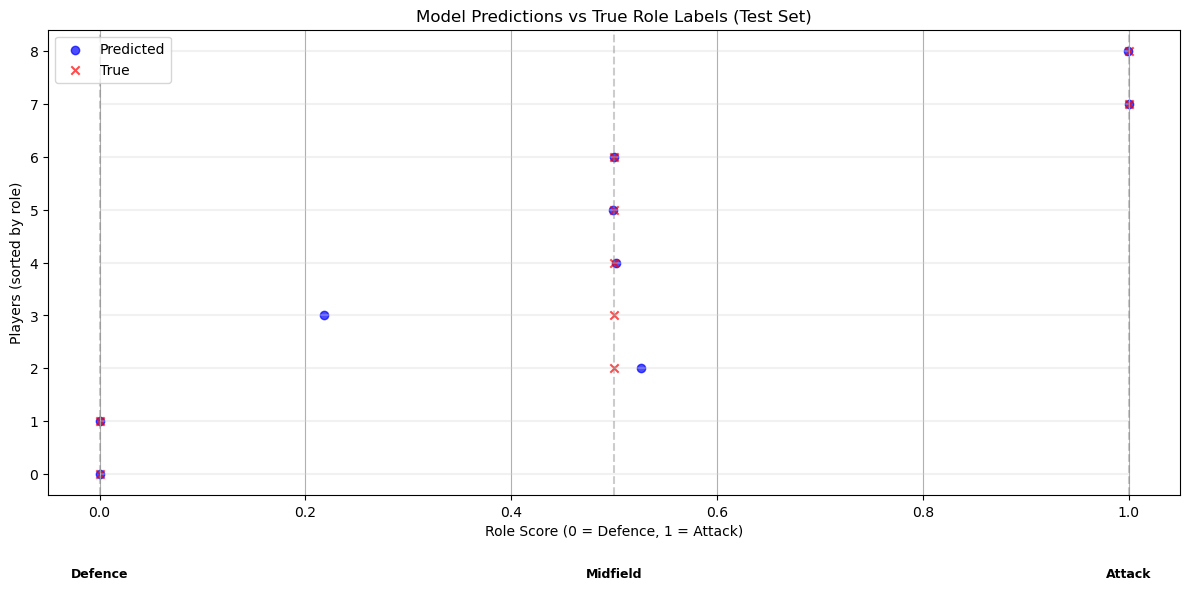

In [3]:
model.evaluate()
model.plot_predictions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


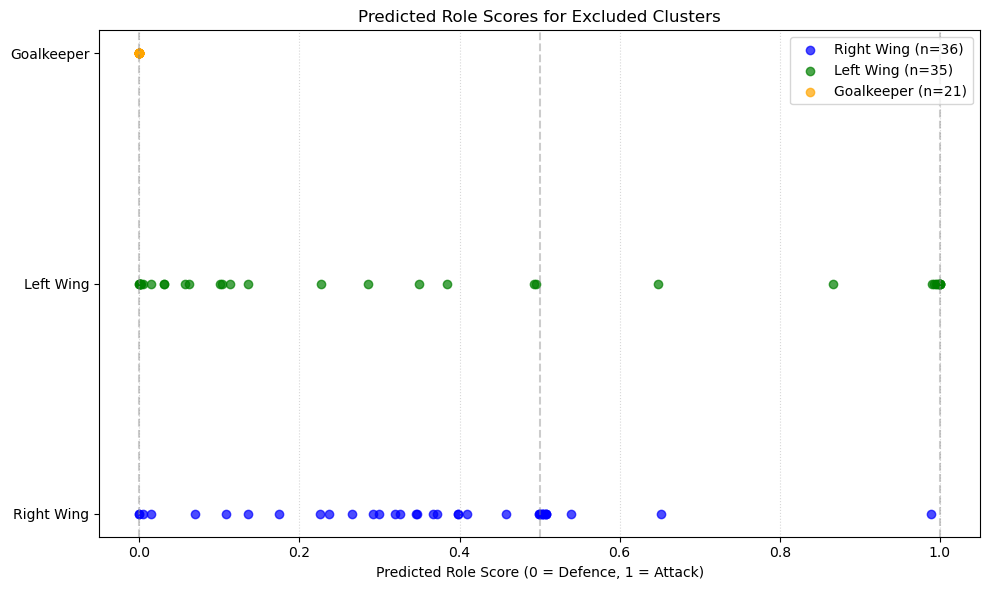

In [4]:
# === Predict excluded clusters (0 = RW, 1 = LW, 2 = GK)
model.plot_unseen_predictions(cluster_ids=[0, 1, 2])

In [5]:
model.save_model_and_scaler(
    model_path="regress_model.keras",
    scaler_path="regress_scaler.pkl",
    feature_path="regress_features.json"
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


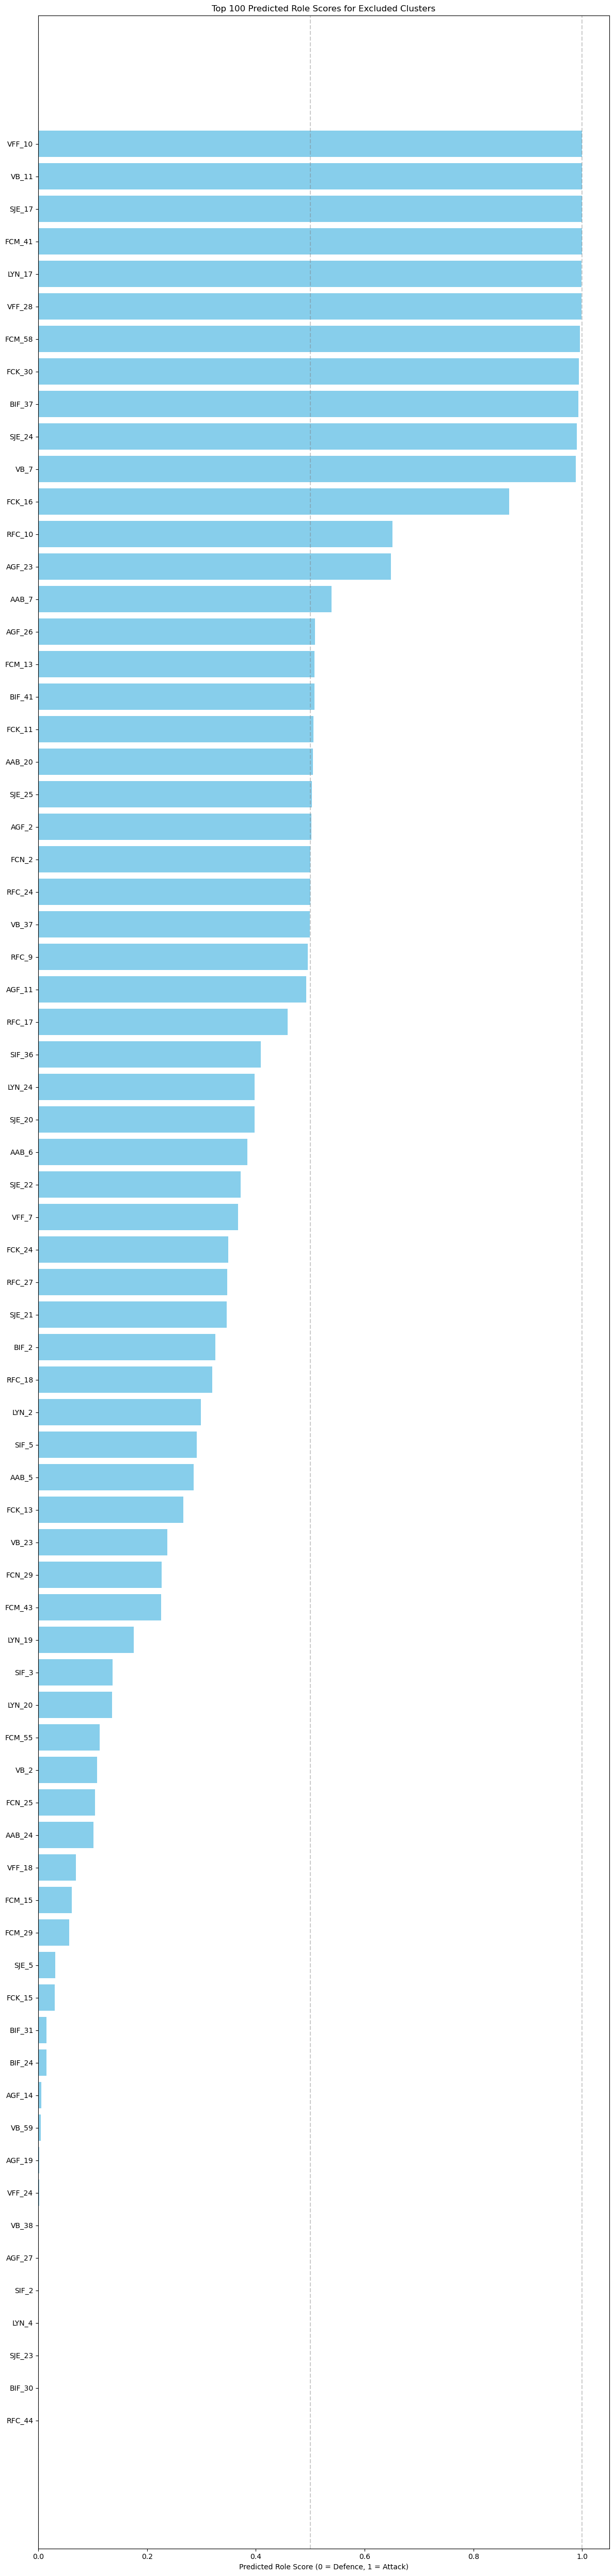

In [10]:
model.plot_unseen_predictions_with_names(cluster_ids=[0, 1], top_n=100)
